<h1><i>Analyzing the Stroop Effect</i></h1>

In psychology, the Stroop effect is a demonstration of interference in the reaction time of a task; it is named after John Ridley Stroop, who first documneted the effect in 1935.
In specific, naming the font color of a printed word is an easier and quicker task if word meaning and font color are congruent. If both are printed in red, the average time to say "RED" in response to the word 'Green' is greater than the time to say "RED" in response to the word 'Mouse'.

<h2>Table of Contents</h2>

<ul>
<li><a href="#variable">Variables</a></li>
<li><a href="#hypothesis">Hypothesis Testing</a></li>
<li><a href="#descriptive">Descriptive Statistics</a></li>
<li><a href="#visualization">Visualizations</a></li>
<li><a href="#conclusions">Statistical Analysis & Conclusion</a></li>
<li><a href="#optional">Optional</a></li>
</ul>


<h2>Loading data and importing modules.</h2>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
data = pd.read_csv('stroopdata.csv')

<h2> Defining Variables </h2>
<a id="#variable"></a>



<p>What is the independent variable? What is the dependent variable?</p>


<i>An independent variable is the one that it is changed in an experiment to test the effects on the dependent variable; in the example of the Stroop Effect we can define the independent variable as the coloring of the words and the dependent variable as the user reading time.</i>

<h2>Hypothesis Testing</h2>
<a id='#hypothesis'></a>



<p> What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.</p>


<i>The Null Hyphotesis H0 is μ Incongruent = μ Congruent <span>
the Alternative Hypothesis H1 is μ Incongruent != μ Congruent</i>

<p><b> The sample size is smaller than 30 data points therefore we can use a t-statistic and t-distribution. In specific,the t-test is the most commonly used method to evaluate the differences in means between two groups. The groups can be independent or dependent. We are going to use a paired sample T-test and compare two sample means from the same population regarding the same variable at two different times. </p></b>

<h2> Descriptive Statistics </h2>
<a href="#descriptive"></a>
<p>Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The dataset is stored in the file 'stroopdata.csv'.</p>


In [2]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


<p>The mean is a measure of central tendency; the standard deviation is a measure of spread and scores how widely spread the values in the data set are. </p>

In [3]:
print('The mean for the congruent group is {} while the incongruent is {};the standard deviation for the congruent group is {} and the incongruent one is {}'.format(data['Congruent'].mean(),data['Incongruent'].mean(),data['Congruent'].std(),data['Incongruent'].std()))

The mean for the congruent group is 14.051125000000004 while the incongruent is 22.01591666666667;the standard deviation for the congruent group is 3.559357957645195 and the incongruent one is 4.797057122469138


<p>We are going to add a new column to the dataframe 'observed_diff' to notice the observed difference between the two groups</p>

In [4]:
data['observed_diff']=data.Congruent-data.Incongruent
data.head()

,Congruent,Incongruent,observed_diff
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


<h2> Visualizations </h2>
<a href="#visualization"></a>
<p> Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.</p>

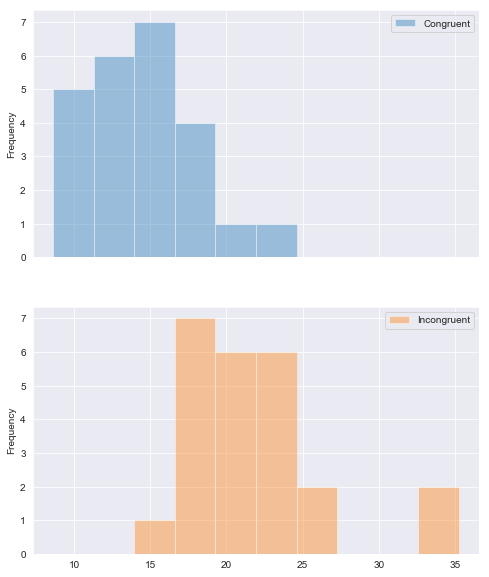

In [5]:
sns.set_style('darkgrid')
data[['Congruent','Incongruent']].plot.hist(figsize=(8,10),subplots=True,alpha=0.4);

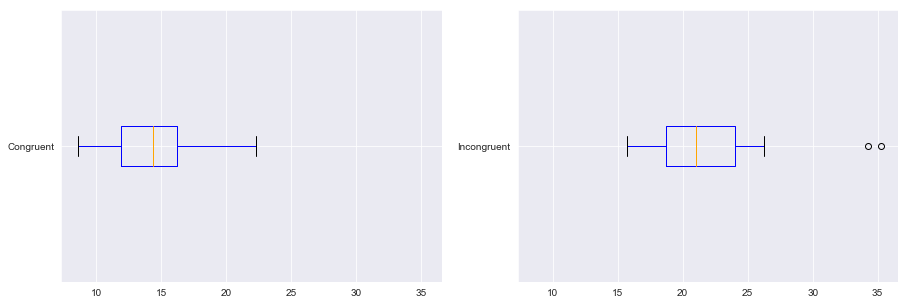

In [6]:
colors = dict(boxes='Blue', whiskers='Blue', medians='Orange', caps='Black')
data[['Congruent','Incongruent']].plot(kind='box',subplots=True,vert=False,figsize=(15,5),color=colors);

<p>Both distributions are right skewed.Also, the visualizations show that the values in the incogruent group are more spreadout; and the incongruent group has outliers.</p>


<a href="#conclusions"></a>
<h2> Statistical Analysis</h2>
<p>Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.</p>

In [6]:
print('Sample size N is: {}'.format(data.shape[0]))
print('Aplha threshold is: 0.05')
print('Degree of freedom: 23')
print('Congruent group mean: {}'.format(data['Congruent'].mean()))
print('Incongruent group mean: {}'.format(data['Incongruent'].mean()))
print('Observed difference between group means: {} '.format(data.observed_diff.mean()))

Sample size N is: 24
Aplha threshold is: 0.05
Degree of freedom: 23
Congruent group mean: 14.051125000000004
Incongruent group mean: 22.01591666666667
Observed difference between group means: -7.964791666666667 


<i> In statistics, point estimation involves the use of sample data to calculate a single value 
(known as a point estimate or statistic) which is to serve as a "best guess" or "best estimate" 
of an unknown population parameter (for example, the population mean). </i>

In [7]:
point_estimation=data['Congruent'].mean() -data['Incongruent'].mean()
point_estimation


-7.964791666666665

In [8]:
#this is a a dependent t-test for paired samples
stats.ttest_rel(a = data['Congruent'], b = data['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [9]:
t=stats.ttest_rel(a = data['Congruent'], b = data['Incongruent'])[0]

In [10]:
alpha = 0.005
t_critical = stats.t.ppf(q=alpha, df=23)
t_critical,-t_critical

(-2.8073356837675236, 2.8073356837675236)

In [11]:
#pvalue = stats.t.cdf(x = t, df = 23 ) * 2 
pvalue=stats.ttest_rel(a = data['Congruent'], b = data['Incongruent'])[1]
pvalue

4.103000585711178e-08

<i><b>We are going to assume that H0 is true and the difference in mean between the Incongruent group and the Congruent one is equal to 0, therefore if our t-statistic is in the region of the t-critcal value we can safely reject the null hypothesis H0</i></b>

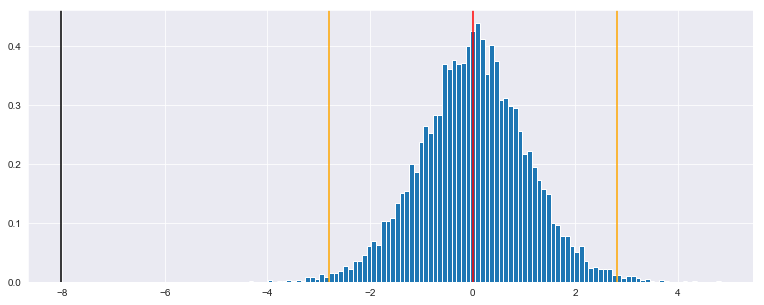

In [12]:
s=np.random.standard_t(23, size=10000)
fig=plt.figure(figsize=(13,5));
plt.hist(s,bins=100,density=True);
plt.axvline(s.mean(),color='red');
plt.axvline(-t_critical,color='orange');
plt.axvline(t_critical,color='orange');
plt.axvline(t,color='black')

<b><i>With a pvalue <= alpha we can reject the null hypothesis; therefore the difference oberseved between the two groups has statiscal significance. </b></i>

In [73]:
diff_mean=[]
for value in range(10000):
    bootsample=data.sample(27,replace=True)
    diff=(bootsample.Congruent-bootsample.Incongruent).mean()
    diff_mean.append(diff)
obsdiff=np.array(diff_mean)


-0.0013234795576320124

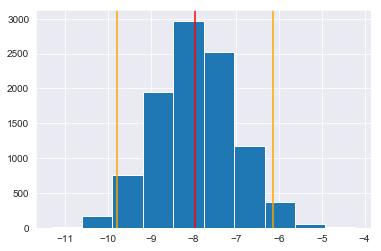

In [74]:
mean_value=data.Congruent.mean()-data.Incongruent.mean()
null_vals=np.random.normal(mean_value,obsdiff.std(),10000)
plt.hist(null_vals);

plt.axvline(np.percentile(null_vals,2.5),color='orange')
plt.axvline(np.percentile(null_vals,97.5),color='orange')
np.percentile(null_vals,0.5),np.percentile(null_vals,99.5)
plt.axvline(mean_value,color='red');
null_mean=null_vals.mean()
null_mean -mean_value

In [75]:
pvalue=(null_vals >obsdiff).mean()#+ (null_vals > mean_value +(mean_value -obsdiff)).mean()
pvalue

0.4968

 
<h2>Optional</h2>
<a href="#optional"></a>
 <p>Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!</p>

<p>There are two main theories used to explain the Stroop effect: <b>Speed of processing theory</b> and <b>Selective attention theory.</b> The experiment we conducted supports the second one.The Stroop effect is a demonstration of the phenomenon that the brain's reaction time slows down when it has to deal with conflicting information. This slowed reaction time happens because of interference, or a processing delay caused by competing or incompatible functions in the brain. </p>
<p></p>
<p><i><b> An alternative task</i></b> could be to observe if there is any time difference in bilingual people (Italian-English) to spell words containing letters such as A,E,I which have different sounds in the two languages</p> 

<h2>Reference List</h2>


<a href='https://www.wisegeek.com/what-is-the-stroop-effect.htm'/>What is the stroop effect</a>
<p></p>

<a href='https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.std.html'> Generating a t-distribution</a>
<p></p>
<a href='https://en.wikipedia.org/wiki/Point_estimation'>Point of Estimation</a>
<p></p>
<a href='https://github.com/anoru/Analyzing-the-Stroop-Effect/blob/master/StroopEffect.ipynb'>Git-hub repositorie</a>